# Initial value problem for colliding gravitational plane waves I by Hauser & Ernst
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

https://aip.scitation.org/doi/abs/10.1063/1.528355

Note:  Equation 2.22 is the Ernst equation.  See other notebook for its derivation.  The metric 1.1 is in double null coordinates.  Hopefully it's the case that after transforming back one does get Laplace's equation 1.4

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,y,du,dv,dx,dy = symbols('u v x y du dv dx dy')

In [4]:
rho = Function('rho')(u,v)
rho

In [5]:
psi = Function('psi')(u,v)
psi

In [6]:
gamma = Function('gamma')(u,v)
gamma

In [7]:
variables = Matrix([u,v,x,y])
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [8]:
differentials = Matrix([du,dv,dx,dy])
differentials

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [24]:
lineElement = expand( rho * ( exp(-2*psi) * dx**2 + exp(2*psi) * dy**2 ) - (2/rho**(Rational(1,2))) * ( exp(2*gamma)*du*dv) )
lineElement 

In [25]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡                2⋅γ(u, v)                                          ⎤
⎢              -ℯ                                                   ⎥
⎢     0        ────────────           0                   0         ⎥
⎢                _________                                          ⎥
⎢              ╲╱ ρ(u, v)                                           ⎥
⎢                                                                   ⎥
⎢  2⋅γ(u, v)                                                        ⎥
⎢-ℯ                                                                 ⎥
⎢────────────       0                 0                   0         ⎥
⎢  _________                                                        ⎥
⎢╲╱ ρ(u, v)                                                         ⎥
⎢                                                                   ⎥
⎢                                     -2⋅ψ(u, v)                    ⎥
⎢     0             0        ρ(u, v)⋅ℯ                    0         ⎥
⎢                   

In [26]:
import sympy

In [27]:
m = sympy.Array(g)
m

⎡                2⋅γ(u, v)                                          ⎤
⎢              -ℯ                                                   ⎥
⎢     0        ────────────           0                   0         ⎥
⎢                _________                                          ⎥
⎢              ╲╱ ρ(u, v)                                           ⎥
⎢                                                                   ⎥
⎢  2⋅γ(u, v)                                                        ⎥
⎢-ℯ                                                                 ⎥
⎢────────────       0                 0                   0         ⎥
⎢  _________                                                        ⎥
⎢╲╱ ρ(u, v)                                                         ⎥
⎢                                                                   ⎥
⎢                                     -2⋅ψ(u, v)                    ⎥
⎢     0             0        ρ(u, v)⋅ℯ                    0         ⎥
⎢                   

In [13]:
from einsteinpy.symbolic import *

In [28]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [29]:
metric = MetricTensor(m,syms)

In [30]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                ∂                                                                         
⎢⎢                ──(ρ(u, v))                                                               
⎢⎢  ∂             ∂u                                                                        
⎢⎢2⋅──(γ(u, v)) - ───────────  0                                      0                     
⎢⎢  ∂u             2⋅ρ(u, v)                                                                
⎢⎢                                                                                          
⎢⎢             0               0                                      0                     
⎢⎢                                                                                          
⎢⎢                                ⎛                        ∂          ⎞                     
⎢⎢                                ⎜                        ──(ρ(u, v))⎟                     
⎢⎢                                ⎜          ∂             ∂v         

In [31]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                         2                                 2                               
⎢            ⎛∂          ⎞      ∂           ∂              ∂                                
⎢- 2⋅ρ(u, v)⋅⎜──(ψ(u, v))⎟  + 2⋅──(γ(u, v))⋅──(ρ(u, v)) - ───(ρ(u, v))                      
⎢            ⎝∂u         ⎠      ∂u          ∂u              2                               
⎢                                                         ∂u                   ∂           ∂
⎢─────────────────────────────────────────────────────────────────────     - 2⋅──(ψ(u, v))⋅─
⎢                               ρ(u, v)                                        ∂u          ∂
⎢                                                                                           
⎢                                                                                           
⎢                                                       2                           ⎛∂      
⎢                                                      ∂              

In [32]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                             2                             
⎢                                                ⎛∂          ⎞      ∂           ∂           
⎢                                    - 2⋅ρ(u, v)⋅⎜──(ψ(u, v))⎟  + 2⋅──(γ(u, v))⋅──(ρ(u, v)) 
⎢                                                ⎝∂u         ⎠      ∂u          ∂u          
⎢                                                                                           
⎢                                    ───────────────────────────────────────────────────────
⎢                                                                   ρ(u, v)                 
⎢                                                                                           
⎢                                                                                           
⎢    ⎛  ⎛                             2          ⎞                2          ⎞              
⎢    ⎜  ⎜∂           ∂               ∂           ⎟               ∂    

In [19]:
#  R = RicciScalar.from_riccitensor(Ric)
#  R.simplify()
#  R.expr

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [33]:
simplify(Ric.tensor())

⎡                         2                                 2                               
⎢            ⎛∂          ⎞      ∂           ∂              ∂                                
⎢- 2⋅ρ(u, v)⋅⎜──(ψ(u, v))⎟  + 2⋅──(γ(u, v))⋅──(ρ(u, v)) - ───(ρ(u, v))                      
⎢            ⎝∂u         ⎠      ∂u          ∂u              2                               
⎢                                                         ∂u                   ∂           ∂
⎢─────────────────────────────────────────────────────────────────────     - 2⋅──(ψ(u, v))⋅─
⎢                               ρ(u, v)                                        ∂u          ∂
⎢                                                                                           
⎢                                                                                           
⎢                                                       2                           ⎛∂      
⎢                                                      ∂              

In [34]:
simplify(einst.tensor())

⎡                         2                                 2                               
⎢            ⎛∂          ⎞      ∂           ∂              ∂                                
⎢- 2⋅ρ(u, v)⋅⎜──(ψ(u, v))⎟  + 2⋅──(γ(u, v))⋅──(ρ(u, v)) - ───(ρ(u, v))                      
⎢            ⎝∂u         ⎠      ∂u          ∂u              2                               
⎢                                                         ∂u                                
⎢─────────────────────────────────────────────────────────────────────                      
⎢                               ρ(u, v)                                                     
⎢                                                                                           
⎢                                                                                           
⎢                              2                                                    ⎛∂      
⎢                             ∂                                       

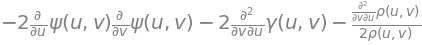

In [36]:
Ric.tensor()[0,1]

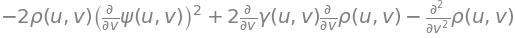

In [44]:
Ric.tensor()[1,1].args[1]

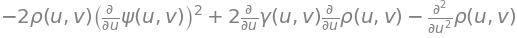

In [47]:
Ric.tensor()[0,0].args[1]

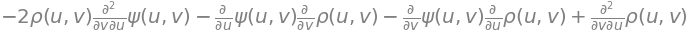

In [50]:
Ric.tensor()[2,2].args[1]

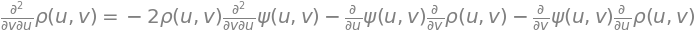

In [76]:
Eq(diff(rho,u,v), solve( Ric.tensor()[3,3].args[1], diff(rho,u,v) )[0] ) 

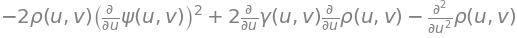

In [70]:
simplify(einst.tensor())[0,0].args[1]

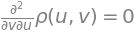

In [72]:
#  This would be the wave equation for rho 
rhoWaveEquation = Eq(simplify(einst.tensor())[0,1].args[1],0)
rhoWaveEquation 

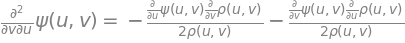

In [73]:
#  Wave equation for psi 
psiWaveEquation = Eq(diff(psi,u,v),expand(solve( simplify(einst.tensor())[2,2].args[2] + simplify(einst.tensor())[3,3].args[1] , diff(psi,u,v) )[0]))
psiWaveEquation

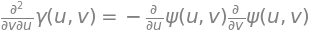

In [87]:
gammaWaveEquation = Eq(diff(gamma,u,v), solve( simplify(einst.tensor())[3,3].args[1].subs(psiWaveEquation.args[0],psiWaveEquation.args[1]).subs(rhoWaveEquation.args[0],rhoWaveEquation.args[1]), diff(gamma,u,v))[0])
gammaWaveEquation

In [89]:
vacuumFieldEquations = Matrix([rhoWaveEquation,psiWaveEquation,gammaWaveEquation])
vacuumFieldEquations

⎡                            2                                       ⎤
⎢                           ∂                                        ⎥
⎢                         ─────(ρ(u, v)) = 0                         ⎥
⎢                         ∂v ∂u                                      ⎥
⎢                                                                    ⎥
⎢                   ∂           ∂             ∂           ∂          ⎥
⎢   2               ──(ψ(u, v))⋅──(ρ(u, v))   ──(ψ(u, v))⋅──(ρ(u, v))⎥
⎢  ∂                ∂u          ∂v            ∂v          ∂u         ⎥
⎢─────(ψ(u, v)) = - ─────────────────────── - ───────────────────────⎥
⎢∂v ∂u                     2⋅ρ(u, v)                 2⋅ρ(u, v)       ⎥
⎢                                                                    ⎥
⎢                2                                                   ⎥
⎢               ∂               ∂           ∂                        ⎥
⎢             ─────(γ(u, v)) = -──(ψ(u, v))⋅──(ψ(u, v))              ⎥
⎣     